# Convolutional Neural Networks with Keras and TensorFlow Exercise 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1. Load the Dataset

For this exercise, we will again use the Fashion MNIST dataset.  The dataset consists of 60,000 train and 10,000 test images of fashion items.

Import the necessary libraries (TensorFlow, Keras, NumPy, Matplotlib), and  load the Fashion MNIST dataset from the Keras built-in datasets.

In [ ]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:

print('tensorflow version {}'.format(tf.__version__))

tensorflow version 2.14.0


In [4]:
# load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
# convert the labels into one-hot encoding format
train_label_onehot_10 = keras.utils.to_categorical(train_label, 10)
test_label_onehot_10 = keras.utils.to_categorical(test_label, 10)

Display the shape of the train and test arrays of images and labels.

In [ ]:

print('Training data inputs: ', train_data.shape)
print('Training label: ', train_label_onehot_10.shape)
print('Test data inputs: ', test_data.shape)
print('Test label: ', test_label_onehot_10.shape)

Training data inputs:  (60000, 28, 28)
Training label:  (60000, 10)
Test data inputs:  (10000, 28, 28)
Test label:  (10000, 10)


Display the maximum and minimum values of the images.

In [ ]:

print('Maximum value in training set: ', train_data.max())
print('Minimum value in training set: ', train_data.min())
print('Maximum value in test set: ', test_data.max())
print('Minimum value in test set: ', test_data.min())

Maximum value in training set:  255
Minimum value in training set:  0
Maximum value in test set:  255
Minimum value in test set:  0


Resize the images to be in the [0,1] range, and display again the maximum and minimum values to make sure that the scaling was done properly.

In [ ]:

# scale the pixels into range [0,1]
fashion_train = train_data/255
fashion_test = test_data/255

print('Maximum value in training set: ', train_data.max())
print('Minimum value in training set: ', train_data.min())
print('Maximum value in test set: ', test_data.max())
print('Minimum value in test set: ', test_data.min())

Maximum value in training set:  255
Minimum value in training set:  0
Maximum value in test set:  255
Minimum value in test set:  0


Display several images in the training dataset **and their labels**.

In [9]:
# A list of label names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

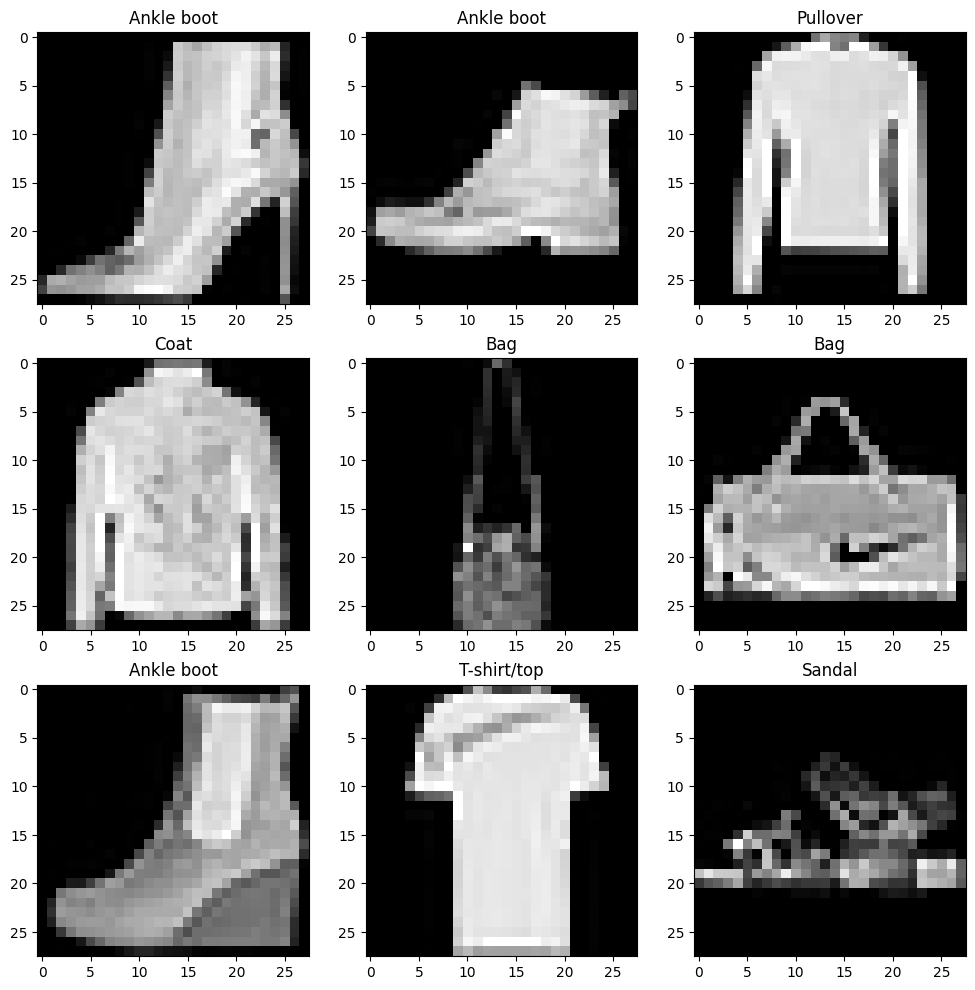

In [10]:
plt.figure(figsize = (12,12))
for index in range(9):
    ax = plt.subplot(3,3, index+1)
    img_index = np.random.randint(0, len(train_data),1)
    plt.imshow(train_data[img_index[0]],cmap = 'gray')
    plt.title(class_names[train_label[img_index[0]]])

## Part 2. Model Definition and Training 

Create a model called `fminst_1` which has the following layers:
- Input layer
- Convolutional layer with 128 filters and kernel size of 3 and padding=`same`
- Convolutional layer with 128 filters and kernel size of 3 and padding=`same`
- Max-pooling layer
- Flatten layer
- Dense layer with 64 neurons
- Output dense layer with 10 neurons

In [ ]:

# import the models and layers
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten


In [21]:
# define the layers in the model
inputs = Input(shape = (28,28,1))
conv1a = Conv2D(filters = 128, kernel_size = 3, padding = 'same')(inputs)
conv1b = Conv2D(filters = 128, kernel_size = 3, padding = 'same')(conv1a)
pool1 = MaxPooling2D()(conv1b)
flat = Flatten()(pool1)
dense1 = Dense(64, activation = 'relu')(flat)
outputs = Dense(10, activation = 'softmax')(dense1)

In [22]:
fminst_1 = Model(inputs, outputs)

Display a summary of the model. State how many parameters the model has.

In [ ]:

fminst_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1605696   
                                                             

Reshape the train arrays of images from the current shape of (60000, 28, 28) to (60000, 28, 28, 1).
Repeat the same for the test array of images.

In [ ]:

train_data = train_data.reshape(60000, 28, 28,1)
test_data = test_data[:,:,:,np.newaxis]

Display the shape of the train and test arrays, to make sure they are as expected.

In [ ]:

print('Training data inputs: ', train_data.shape)
print('Test data inputs: ', test_data.shape)

Training data inputs:  (60000, 28, 28, 1)
Test data inputs:  (10000, 28, 28, 1)


Compile the model using Adam optimizer, and train the model for 10 epochs using a batch size of 128 images.

In [ ]:

fminst_1.compile (optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])


In [30]:
fminst_1.fit(train_data, train_label_onehot_10, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 19s 19ms/step - loss: 5.1934 - accuracy: 0.3939
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 1.2185 - accuracy: 0.5398
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.8678 - accuracy: 0.6788
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.7215 - accuracy: 0.7282
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.6025 - accuracy: 0.7645
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.5085 - accuracy: 0.8063
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3990 - accuracy: 0.8825
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3573 - accuracy: 0.8902
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.3203 - accuracy: 0.8994
Epoch 10/10
469/469 [==============================] - 10s 22ms/step - loss: 0.3030 - acc

Calculate the accuracy of the model on the test dataset.

In [ ]:

vals_test = fminst_1.evaluate(test_data, test_label_onehot_10)

print('Test Accuracy: ', np.round(vals_test[1],4))

313/313 [==============================] - 4s 9ms/step - loss: 0.4114 - accuracy: 0.8811
Test Accuracy:  0.8811


Plot a few images in the test dataset and **display the ground-truth and predicted labels**. (Note that although for training the model we needed to use images with shape (28,28,1), for plotting the images we need to use images with shape (28,28)).

In [34]:
pre_test = fminst_1.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [35]:
test_plot = test_data.reshape(10000, 28, 28)
test_plot.shape

(10000, 28, 28)

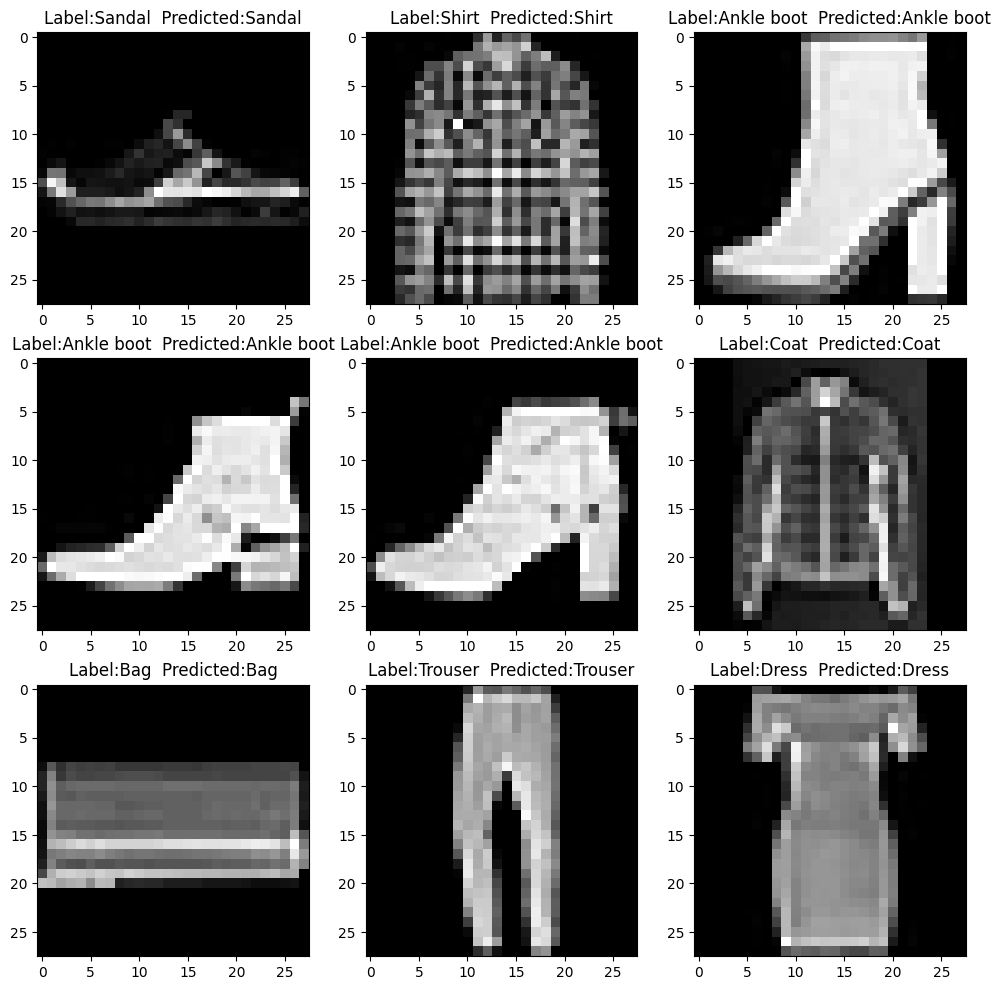

In [36]:


plt.figure(figsize = (12,12))

for n in range(9):
    ax = plt.subplot(3, 3, n+1)
    index = np.random.randint(0, len(test_plot), 1)
    plt.imshow(test_plot[index[0]], cmap = 'gray')
    plt.title('Label:{}  Predicted:{}'.format(class_names[test_label[index[0]]],
                                             class_names[np.argmax(pre_test[index[0]])]))

## Part 3. Define a Larger Model and Use Validation Split 

Create a model called `fmnist_2` which has 3 blocks of Conv-Conv-MaxPooling layers with 64-128-256 filters per block (e.g., the first block should have Conv64-Conv64-MaxPool, etc.), followed by a classifier with a Flatten layer and a sequence of Dense layers with 100, 50, and 10 neurons.

In [ ]:

# define the layers in the model
inputs = Input(shape = (28,28,1))
conv1a = Conv2D(filters = 64, kernel_size = 3, padding = 'same')(inputs)
conv1b = Conv2D(filters = 64, kernel_size = 3, padding = 'same')(conv1a)
pool1 = MaxPooling2D()(conv1b)

conv2a = Conv2D(filters = 128, kernel_size = 3, padding = 'same')(pool1)
conv2b = Conv2D(filters = 128, kernel_size = 3, padding = 'same')(conv2a)
pool2 = MaxPooling2D()(conv2b)

conv3a = Conv2D(filters = 256, kernel_size = 3, padding = 'same')(pool2)
conv3b = Conv2D(filters = 256, kernel_size = 3, padding = 'same')(conv3a)
pool3 = MaxPooling2D()(conv3b)

flat = Flatten()(pool3)
dense1 = Dense(100, activation = 'relu')(flat)
dense2 = Dense(50, activation = 'relu')(dense1)
outputs = Dense(10, activation = 'softmax')(dense2)

# define the model by providing the inputs and outputs
fmnist_2 = Model(inputs, outputs)


In [38]:
fmnist_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       147584    
                                                           

Compile and train the model for 10 epochs with a batch size of 128. Use 25% of the training data for validation.

In [ ]:

fmnist_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
fmnist_2.fit(train_data, train_label_onehot_10,
             epochs = 10, batch_size = 128,
             validation_split = 0.25)


Epoch 1/10
352/352 [==============================] - 13s 28ms/step - loss: 3.4385 - accuracy: 0.7462 - val_loss: 0.5101 - val_accuracy: 0.8191
Epoch 2/10
352/352 [==============================] - 9s 24ms/step - loss: 0.3844 - accuracy: 0.8677 - val_loss: 0.3622 - val_accuracy: 0.8749
Epoch 3/10
352/352 [==============================] - 9s 26ms/step - loss: 0.3065 - accuracy: 0.8926 - val_loss: 0.3276 - val_accuracy: 0.8869
Epoch 4/10
352/352 [==============================] - 10s 28ms/step - loss: 0.2694 - accuracy: 0.9060 - val_loss: 0.3583 - val_accuracy: 0.8726
Epoch 5/10
352/352 [==============================] - 9s 27ms/step - loss: 0.2264 - accuracy: 0.9196 - val_loss: 0.2990 - val_accuracy: 0.8975
Epoch 6/10
352/352 [==============================] - 9s 26ms/step - loss: 0.1980 - accuracy: 0.9296 - val_loss: 0.3380 - val_accuracy: 0.8893
Epoch 7/10
352/352 [==============================] - 9s 26ms/step - loss: 0.1694 - accuracy: 0.9390 - val_loss: 0.3363 - val_accuracy: 0.89

Calculate the accuracy on the test dataset.

Discuss whether the model overfits the training data.

In [ ]:

evals_test = fmnist_2.evaluate(test_data, test_label_onehot_10)
print('test accuracy:{0:5.4f}'.format(evals_test[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.4057 - accuracy: 0.8761
test accuracy:0.8761


The model shows overfitting on the training data. Because the training accuracy is 0.9462,which is higher than test accuracy 0.8761.

## Part 4. Apply Dropout, Early Stopping 

Create a model `fmnist_3` which uses a similar network from the previous section but it has a block of layers with 32-64-128 convolutional filters, and add at least 4 Dropout layers in the model. Select a dropout rate of 20% of the neurons.

In [42]:
from keras.layers import Dropout

In [ ]:

# define the layers in the model
inputs = Input(shape = (28,28,1))

conv1a = Conv2D(filters = 32, kernel_size = 3, padding = 'same')(inputs)
conv1b = Conv2D(filters = 32, kernel_size = 3, padding = 'same')(conv1a)
pool1 = MaxPooling2D()(conv1b)
dropout1 = Dropout(0.2)(pool1)

conv2a = Conv2D(filters = 64, kernel_size = 3, padding = 'same')(dropout1)
conv2b = Conv2D(filters = 64, kernel_size = 3, padding = 'same')(conv2a)
pool2 = MaxPooling2D()(conv2b)
dropout2 = Dropout(0.2)(pool2)

conv3a = Conv2D(filters = 128, kernel_size = 3, padding = 'same')(dropout2)
conv3b = Conv2D(filters = 128, kernel_size = 3, padding = 'same')(conv3a)
pool3 = MaxPooling2D()(conv3b)

flat = Flatten()(pool3)

dense1 = Dense(100, activation = 'relu')(flat)
dropout3 = Dropout(0.2)(dense1)

dense2 = Dense(50, activation = 'relu')(dense1)
dropout4 = Dropout(0.2)(dense2)

outputs = Dense(10, activation = 'softmax')(dropout4)


# define the model with inputs and outputs
fmnist_3 = Model(inputs, outputs)

In [44]:
# compile the model
fmnist_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
fmnist_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        18496     
                                                           

Train the model, and apply an Early Stopping callback, so that the training stops automatically with a patience of 5 epochs.

Measure the time for training the model.

In [45]:
from keras.callbacks import EarlyStopping
import datetime

In [ ]:

# train the model

now = datetime.datetime.now
t = now()

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]

history = fmnist_3.fit(train_data, train_label_onehot_10,
             epochs = 100, batch_size = 128,
             validation_split = 0.25,
             callbacks = callbacks)

print('train time: ', (now() - t))

Epoch 1/100
352/352 [==============================] - 12s 18ms/step - loss: 1.2499 - accuracy: 0.6796 - val_loss: 0.4711 - val_accuracy: 0.8356
Epoch 2/100
352/352 [==============================] - 6s 17ms/step - loss: 0.5443 - accuracy: 0.8129 - val_loss: 0.4100 - val_accuracy: 0.8634
Epoch 3/100
352/352 [==============================] - 5s 16ms/step - loss: 0.4555 - accuracy: 0.8420 - val_loss: 0.3560 - val_accuracy: 0.8693
Epoch 4/100
352/352 [==============================] - 5s 15ms/step - loss: 0.4142 - accuracy: 0.8544 - val_loss: 0.3364 - val_accuracy: 0.8821
Epoch 5/100
352/352 [==============================] - 5s 16ms/step - loss: 0.3834 - accuracy: 0.8660 - val_loss: 0.3126 - val_accuracy: 0.8896
Epoch 6/100
352/352 [==============================] - 5s 15ms/step - loss: 0.3606 - accuracy: 0.8731 - val_loss: 0.3076 - val_accuracy: 0.8927
Epoch 7/100
352/352 [==============================] - 5s 15ms/step - loss: 0.3414 - accuracy: 0.8790 - val_loss: 0.3402 - val_accuracy

Plot the accuracy and loss curves.

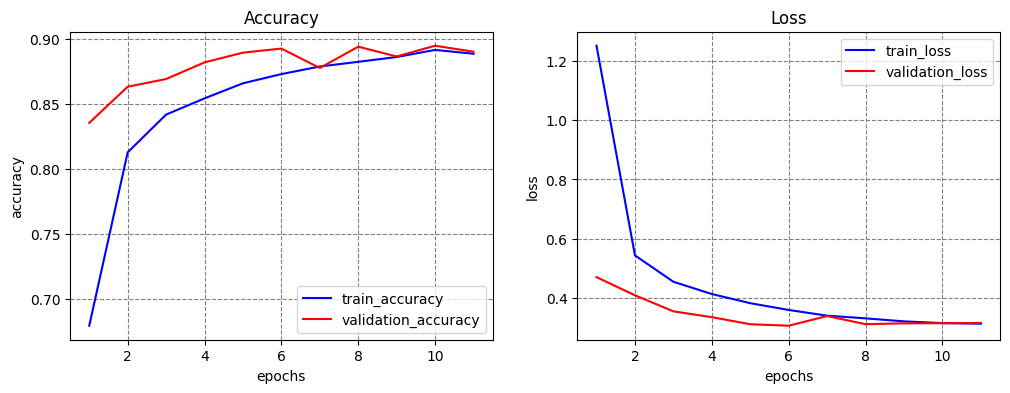

In [ ]:


train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = np.arange(1, len(train_loss) + 1, 1)

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b',label = 'train_accuracy')
plt.plot(epochs, val_accuracy, 'r',label = 'validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(color = 'grey',linestyle = '--')
plt.legend()
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label = 'train_loss')
plt.plot(epochs, val_loss, 'r', label = 'validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(color = 'grey', linestyle = '--')
plt.legend()
plt.title('Loss')

plt.show()

Calculate the accuracy on the test dataset.

In [ ]:

# evaluate on test data
evals_test = fmnist_3.evaluate(test_data, test_label_onehot_10)
print('test accuracy: ', np.round(evals_test[1],4))

313/313 [==============================] - 2s 4ms/step - loss: 0.3383 - accuracy: 0.8841
test accuracy:  0.8841


## Part 5. Batch Normalization, and Data Augmentation

Create a model `fmnist_4` which applies a batch normalization layer to each convolutional block of layers in the model from the previous section.

In [49]:
from keras.layers import BatchNormalization

In [ ]:

# define the layers
inputs = Input(shape = (28,28,1))

conv1a = Conv2D(filters = 32, kernel_size = 3, padding = 'same')(inputs)
conv1b = Conv2D(filters = 32, kernel_size = 3, padding = 'same')(conv1a)
bn1 = BatchNormalization()(conv1b)
pool1 = MaxPooling2D()(bn1)
dropout1 = Dropout(0.2)(pool1)

conv2a = Conv2D(filters = 64, kernel_size = 3, padding = 'same')(dropout1)
conv2b = Conv2D(filters = 64, kernel_size = 3, padding = 'same')(conv2a)
bn2 = BatchNormalization()(conv2b)
pool2 = MaxPooling2D()(bn2)
dropout2 = Dropout(0.2)(pool2)

conv3a = Conv2D(filters = 128, kernel_size = 3, padding = 'same')(dropout2)
conv3b = Conv2D(filters = 128, kernel_size = 3, padding = 'same')(conv3a)
bn3 = BatchNormalization()(conv3b)
pool3 = MaxPooling2D()(bn3)


flat = Flatten()(pool3)

dense1 = Dense(128, activation = 'relu')(flat)
dropout3 = Dropout(0.2)(dense1)
dense2 = Dense(64, activation = 'relu')(dropout3)
dropout4 = Dropout(0.2)(dense2)
outputs = Dense(10, activation = 'softmax')(dropout4)

#define the model
fmnist_4 = Model(inputs, outputs)

In [51]:
# compile the model
fmnist_4.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

fmnist_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0   

Apply data augmentation, by adding width shift (20%), height shift (20%), and horizontal flip.

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [53]:
datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True)

Use the `train_test_split` function to create a validation dataset that contains 20% of the training dataset. Display the shapes of the datasets.

In [54]:
train_data_datagen, val_data_datagen, train_label_datagen, val_label_datagen = train_test_split(train_data,
                                                               train_label_onehot_10,
                                                               test_size = 0.2,
                                                               stratify = train_label_onehot_10)

print('Training images: ',train_data_datagen.shape)
print('Training labels: ',train_label_datagen.shape)
print('Validation images: ',val_data_datagen.shape)
print('Validation labels: ',val_label_datagen.shape)

Training images:  (48000, 28, 28, 1)
Training labels:  (48000, 10)
Validation images:  (12000, 28, 28, 1)
Validation labels:  (12000, 10)


Train the model using Early Stopping and show the training time.

In [ ]:

# define the callbacks

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]

t = now()
history = fmnist_4.fit(datagen.flow(train_data_datagen,train_label_datagen, batch_size = 128),
             steps_per_epoch = len(train_data_datagen)/128,
             epochs = 100,
             validation_data = (val_data_datagen, val_label_datagen),
             callbacks = callbacks)
print(f'Traing time: {now() - t}')

Epoch 1/100
375/375 [==============================] - 23s 50ms/step - loss: 1.0547 - accuracy: 0.6127 - val_loss: 0.8634 - val_accuracy: 0.6982
Epoch 2/100
375/375 [==============================] - 19s 50ms/step - loss: 0.7206 - accuracy: 0.7286 - val_loss: 0.5998 - val_accuracy: 0.7657
Epoch 3/100
375/375 [==============================] - 19s 50ms/step - loss: 0.6449 - accuracy: 0.7536 - val_loss: 0.5234 - val_accuracy: 0.8058
Epoch 4/100
375/375 [==============================] - 19s 50ms/step - loss: 0.5978 - accuracy: 0.7747 - val_loss: 0.4828 - val_accuracy: 0.8212
Epoch 5/100
375/375 [==============================] - 18s 48ms/step - loss: 0.5646 - accuracy: 0.7900 - val_loss: 0.4618 - val_accuracy: 0.8276
Epoch 6/100
375/375 [==============================] - 18s 48ms/step - loss: 0.5343 - accuracy: 0.8020 - val_loss: 0.4171 - val_accuracy: 0.8474
Epoch 7/100
375/375 [==============================] - 18s 49ms/step - loss: 0.5129 - accuracy: 0.8098 - val_loss: 0.4153 - val_ac

Plot the accuracy and loss curves.

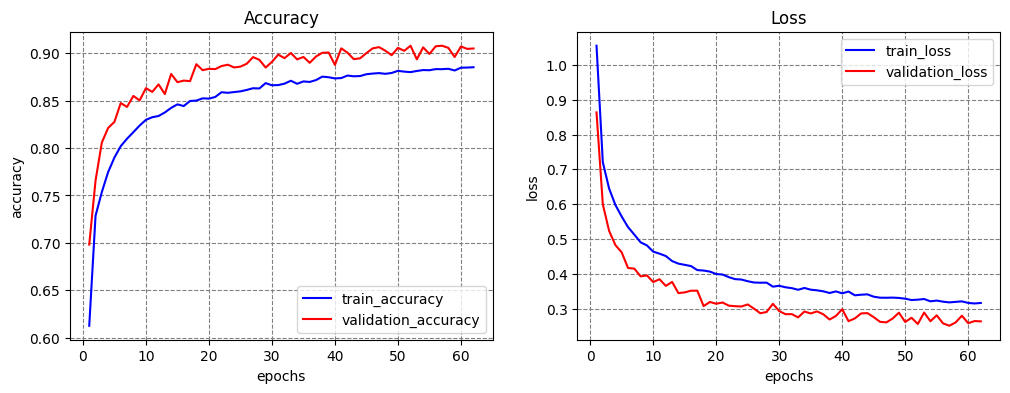

In [ ]:

train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochsn = np.arange(1, len(train_accuracy)+1, 1)

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(epochsn, train_accuracy, 'b', label = 'train_accuracy')
plt.plot(epochsn, val_accuracy, 'r', label = 'validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(color = 'grey', linestyle = '--')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochsn, train_loss, 'b', label = 'train_loss')
plt.plot(epochsn, val_loss, 'r', label = 'validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(color = 'grey', linestyle = '--')
plt.title('Loss')
plt.legend()

plt.show()

Calculate the accuracy on the test dataset.

In [ ]:


evals_test = fmnist_4.evaluate(test_data, test_label_onehot_10)
print(f'Test accuracy: {evals_test[1]:{10}.{6}}')

313/313 [==============================] - 1s 5ms/step - loss: 0.2795 - accuracy: 0.8964
Test accuracy:     0.8964


## Part 6. Saving and Loading the Model 

Save the latest model.

In [ ]:

fmnist_4.save('fmnist_4.keras')

Load the saved model and check if the accuracy on the test set matches the one calculated previously.

In [ ]:

from keras.models import load_model

fmnist_4_load = load_model('fmnist_4.keras')
evals_test_fm4 = fmnist_4_load.evaluate(test_data, test_label_onehot_10)

print(f'Test accuracy: {evals_test_fm4[1]: {10}.{6}}')

313/313 [==============================] - 2s 5ms/step - loss: 0.2795 - accuracy: 0.8964
Test accuracy:     0.8964


What is the total number of parameters of this model?

In [ ]:

fmnist_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0   

final model has 443818 parameters.